Epoch 1/20
782/782 [==============================] - 19s 19ms/step - loss: 4.2774 - accuracy: 0.0531 - val_loss: 3.8639 - val_accuracy: 0.1027
Epoch 2/20
782/782 [==============================] - 15s 19ms/step - loss: 3.7932 - accuracy: 0.1087 - val_loss: 3.5055 - val_accuracy: 0.1642
Epoch 3/20
782/782 [==============================] - 14s 18ms/step - loss: 3.4219 - accuracy: 0.1717 - val_loss: 3.1122 - val_accuracy: 0.2458
Epoch 4/20
782/782 [==============================] - 14s 18ms/step - loss: 3.0672 - accuracy: 0.2334 - val_loss: 2.7901 - val_accuracy: 0.2913
Epoch 5/20
782/782 [==============================] - 14s 18ms/step - loss: 2.7678 - accuracy: 0.2914 - val_loss: 2.7500 - val_accuracy: 0.3113
Epoch 6/20
782/782 [==============================] - 14s 18ms/step - loss: 2.5349 - accuracy: 0.3369 - val_loss: 2.4091 - val_accuracy: 0.3818
Epoch 7/20
782/782 [==============================] - 14s 18ms/step - loss: 2.3559 - accuracy: 0.3757 - val_loss: 2.4126 - val_accuracy:

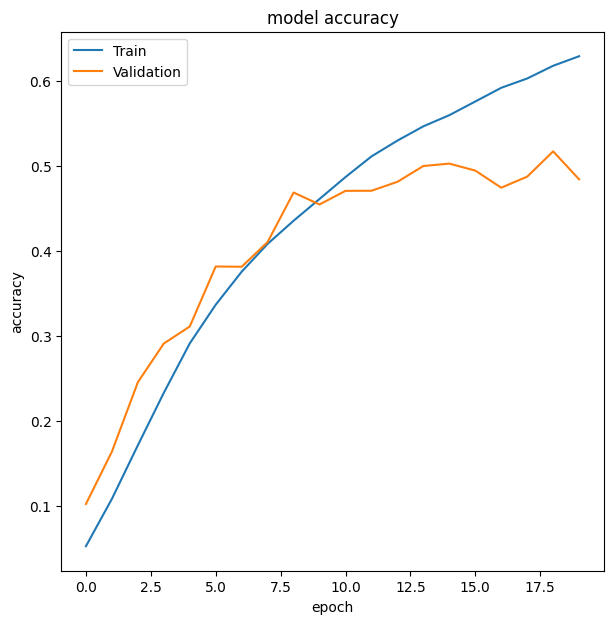

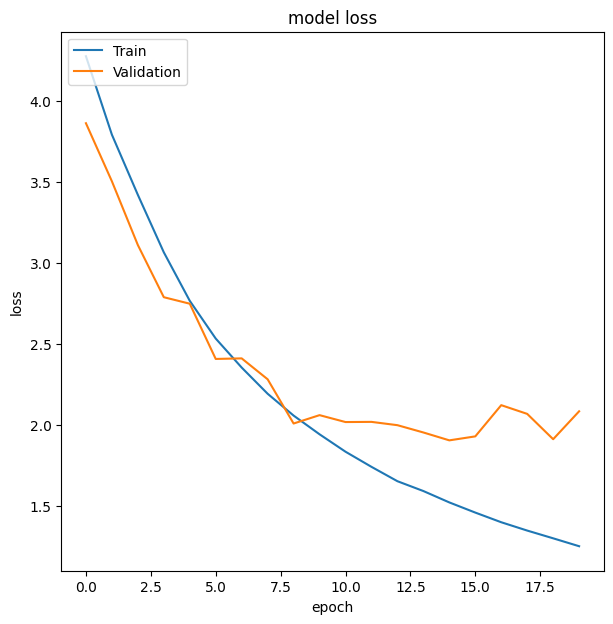

313/313 [==============================] - 2s 4ms/step - loss: 2.0859 - accuracy: 0.4842
2.0859477519989014
0.48420000076293945
313/313 [==============================] - 1s 3ms/step


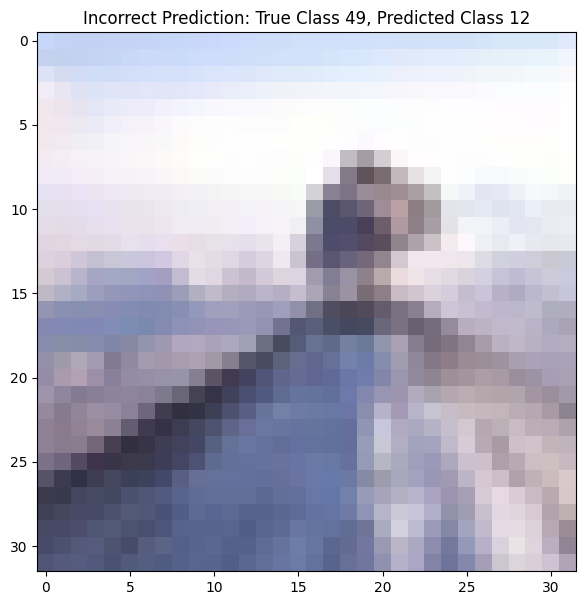

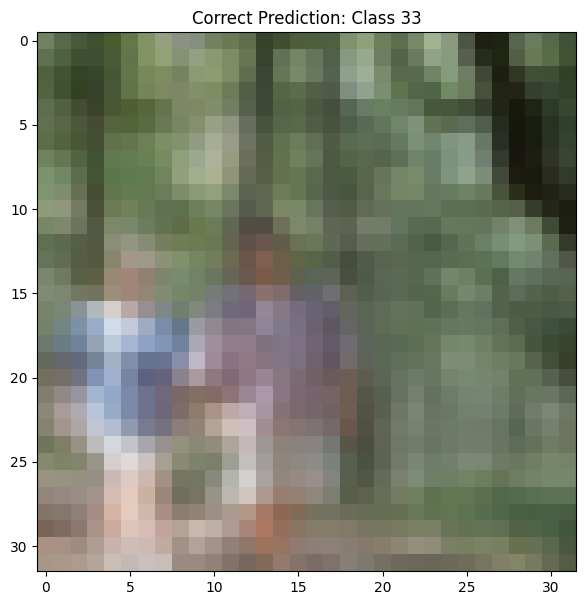

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

import keras
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Reshape, Permute, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras import backend as K

# Load data and formatting information
debug = False

num_superclasses = 10
num_classes = 100
# classes = {}
batch_size = 64

train_imgs = 50000
test_imgs = 10000
rgb_depth = 3
img_rows, img_cols = 32, 32
epochs = 20

keras.datasets.cifar100.load_data(label_mode="fine")
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()
assert x_train.shape == (train_imgs, img_rows, img_cols, rgb_depth)
assert x_test.shape == (test_imgs, img_rows, img_cols, rgb_depth)
assert y_train.shape == (train_imgs, 1)
assert y_test.shape == (test_imgs, 1)

# Additional data formatting
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)

else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

# Turning matrix values from [0-255] to [0-1]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

if debug:
  print('x_train shape:', x_train.shape)
  print(x_train.shape[0], 'train samples')
  print(x_test.shape[0], 'test samples')

# Turns vector into matrix
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
if debug:
  print(y_train)
  print(y_test)

# First Convolution Block
model = Sequential()
model.add(Conv2D(batch_size, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# Second Convolution Block
model.add(Conv2D(batch_size * 2, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(batch_size * 2, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

# Third Convolution Block
model.add(Conv2D(batch_size * 2 * 2, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(batch_size * 2 * 2, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Plot point in graph and print
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

test_loss, test_accuracy=model.evaluate(x_test, y_test)
print(test_loss)
print(test_accuracy)

# Make predictions
predictions = model.predict(x_test)
predictions_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Find the first incorrect prediction
incorrect_indices = np.where(predictions_classes != true_classes)[0]
if len(incorrect_indices) > 0:
    first_incorrect_index = incorrect_indices[0]
    plt.imshow(x_test[first_incorrect_index])
    plt.title(f"Incorrect Prediction: True Class {true_classes[first_incorrect_index]}, Predicted Class {predictions_classes[first_incorrect_index]}")
    plt.show()

# Find the first correct prediction
correct_indices = np.where(predictions_classes == true_classes)[0]
if len(correct_indices) > 0:
    first_correct_index = correct_indices[0]
    plt.imshow(x_test[first_correct_index])
    plt.title(f"Correct Prediction: Class {true_classes[first_correct_index]}")
    plt.show()